# Flow of Navier-Stokes fluid past a circular obstacle

$$
\mathbb{S}=
\begin{cases}
\Omega = \{(x,y)~:~x^2 + y^2 > R^2~,~|x|<\tfrac{1}{2}L_x~,~|y|<\tfrac{1}{2}L_y\} \\
\partial\Omega_{\text{obstable}} = \{(x,y)~:~x^2 + y^2 = R^2\} \\
\partial\Omega_{\text{left}} = \{(x,y)~:~x=-\tfrac{1}{2}L_x\} \\
\partial\Omega_{\text{right}} = \{(x,y)~:~x=\tfrac{1}{2}L_x\} \\
\partial\Omega_{\text{lower}} = \{(x,y)~:~y=-\tfrac{1}{2}L_y\} \\
\partial\Omega_{\text{upper}} = \{(x,y)~:~y=\tfrac{1}{2}L_y\} \\
\textbf{u}_{\text{E}}\vert_{\partial\Omega_{\text{lower}}\cup\partial\Omega_{\text{upper}}\cup\Omega_{\text{obstable}}}=\textbf{0} & \text{no-slip and no-penetration} \\
\boldsymbol{\tau}_{\text{N}}\vert_{\partial\Omega_{\text{left}}} = p_\text{in}\textbf{e}_x & \text{pressure driven flow from left to right} \\
\boldsymbol{\tau}_{\text{N}}\vert_{\partial\Omega_{\text{left}}} = \textbf{0} \\
\end{cases}
$$

In [ ]:
from lucifex.fdm import FE, CN
from lucifex.sim import run
from lucifex.viz import plot_mesh, plot_colormap
from lucifex.utils import triangulation, finite_element_function_components
from lucifex.io import write, get_ipynb_file_name

from py.navier_stokes_obstacle import navier_stokes_circle_obstacle

Lx = 2.0
Ly = 1.0
r = Ly / 5
c = (0.5 * Lx, 0.5 * Ly)
simulation = navier_stokes_circle_obstacle(
    Lx=Lx,
    Ly=Ly,
    r=r, 
    c=c,
    dx=0.05, 
    rho=1.0,
    mu=1.0,
    p_in=8.0,
    dt_max=0.5,
    dt_min=0.0,
    cfl_courant=1.0,
    ns_scheme='ipcs',
    D_adv=FE,
    D_visc=CN,
)

n_stop = 20
dt_init = 1e-6
n_init = 5
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

<!-- # Navier-Stokes flow

initial-boundary value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\rho  \left(\frac{\partial\textbf{u}}{\partial t}+\textbf{u}\cdot\nabla\textbf{u}\right)=\nabla\cdot\sigma + \textbf{f}(\textbf{x}, t)$$

$$\nabla\cdot\textbf{u}=0$$

constitutive relations

$$\varepsilon(\textbf{u})=\tfrac{1}{2}(\nabla\textbf{u} + (\nabla\textbf{u})^{\mathsf{T}})$$

$$\sigma(\textbf{u}, p) = -p\,\mathsf{I} + 2\mu\varepsilon(\textbf{u})$$

$$\implies \nabla\cdot\sigma=-\nabla p + \mu\nabla^2\textbf{u}$$

initial conditions

$$\textbf{u}(\textbf{x},t=0)=\textbf{u}_0(\textbf{x})$$

$$p(\textbf{x},t=0)=p_0(\textbf{x})$$

essential boundary condition on $\textbf{x}\in\partial\Omega_{\text{E}}$

$$\textbf{u}=\textbf{u}_{\text{E}}$$

natural boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{E}}$

$$\textbf{n}\cdot\sigma = \sigma_{\text{N}}$$

CFL timestep

$$\Delta t^n = \min(\Delta t_{\text{max}}, \Delta t_{\text{CFL}}(\textbf{u}^n))$$

## Incremental pressure correction scheme (IPCS)

$$\rho  \frac{\widetilde{\textbf{u}}^{n+1}-\textbf{u}^n}{\Delta t^n}+\rho  \mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u})=\nabla\cdot\sigma(\mathcal{D}_\sigma(\textbf{u}), p^n) + \mathcal{D}_{\textbf{f}}(\textbf{f})$$

$$-\rho\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n}=\nabla^2 p^n - \nabla^2p^{n+1}$$

$$\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n}=\nabla p^n - \nabla p^{n+1}$$

$$\mathcal{D}_{\textbf{u}}=\text{FE}~,~\mathcal{D}_{\sigma}=\text{CN}~,~\mathcal{D}_{\textbf{f}}=\text{BE}$$

variational formulation $\forall(\textbf{v}, q)\in V_{\textbf{u}} \times V_p$

$$F_1(\widetilde{\textbf{u}}^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\rho  \textbf{v}\cdot\frac{\widetilde{\textbf{u}}^{n+1}-\textbf{u}^n}{\Delta t^n} + \rho  \textbf{v}\cdot\mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u}) + \varepsilon(\textbf{v})\cdot\sigma(\mathcal{D}_\sigma(\textbf{u}), p^n) -\textbf{v}\cdot\mathcal{D}_{\textbf{f}}(\textbf{f}) -\int_{\partial\Omega}\textbf{v}\cdot(\textbf{n}\cdot\sigma(\mathcal{D}_\sigma(\textbf{u}), p^n))$$

$$F_2(p^{n+1}, q) = \int_\Omega\text{d}\Omega~\nabla q\cdot\nabla p^{n+1} - \nabla q\cdot\nabla p^n + q\rho\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} $$

$$F_3(u^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\textbf{v}\cdot\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} + \textbf{v}\cdot\nabla p^{n+1} - \textbf{v}\cdot\nabla p^n$$

## Chorin's scheme

$$\rho  \frac{\widetilde{\textbf{u}}^{n+1}-\rho  \textbf{u}^n}{\Delta t^n}+\mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u})= \mu\nabla^2\mathcal{D}_\sigma(\textbf{u}) + \mathcal{D}_{\textbf{f}}(\textbf{f})$$

$$\rho\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} = \nabla^2p^{n+1}$$

$$\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n}= - \nabla p^{n+1}$$

$$\mathcal{D}_{\textbf{u}}=\text{FE}~,~\mathcal{D}_{\sigma}=\text{FE}~,~\mathcal{D}_{\textbf{f}}=\text{BE}$$

variational formulation $\forall(\textbf{v}, q)\in V_{\textbf{u}} \times V_p$

$$F_1(\widetilde{\textbf{u}}^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\textbf{v}\cdot\frac{\widetilde{\textbf{u}}^{n+1}-\textbf{u}^n}{\Delta t^n} + \textbf{v}\cdot\mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u}) + \mu\nabla\textbf{v}\cdot\nabla\mathcal{D}_{\sigma}(\textbf{u}) -\textbf{v}\cdot\mathcal{D}_{\textbf{f}}(\textbf{f})$$

$$F_2(p^{n+1}, q) = \int_\Omega\text{d}\Omega~\nabla q\cdot\nabla p^{n+1} + \rho q\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} $$

$$F_3(u^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\textbf{v}\cdot\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} + \textbf{v}\cdot\nabla p^{n+1}$$ -->

In [ ]:
u, p = simulation['u', 'p']
mesh = u.function_space.mesh

time_index = -1
un = u.series[time_index]
pn = p.series[time_index]

ux, uy = finite_element_function_components(('P', 1), un, names=('ux', 'uy'))

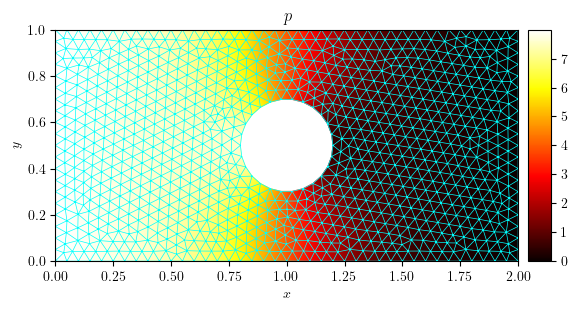

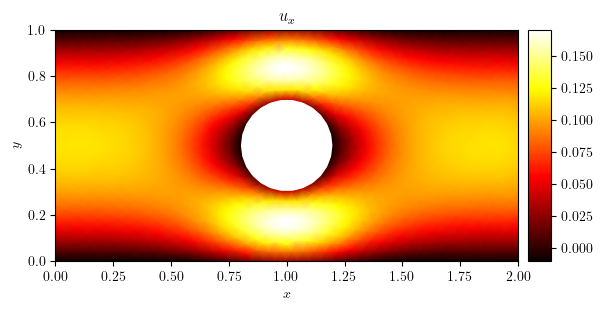

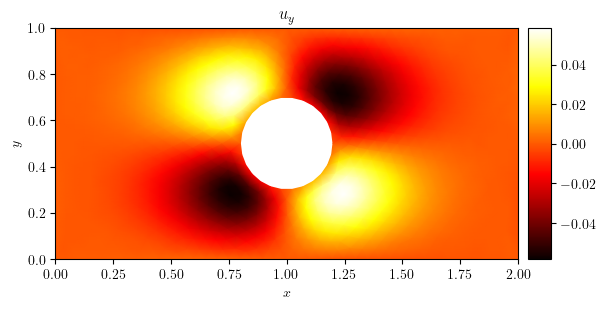

In [3]:
mesh_tri = triangulation(mesh)
pn_tri = triangulation(pn)
ux_tri = triangulation(ux)
uy_tri = triangulation(uy)

fig, ax = plot_colormap((mesh_tri, pn_tri), title='$p$')
plot_mesh(fig, ax, mesh, color='cyan', linewidth=0.5)
write(fig, f'{get_ipynb_file_name()}_p', './figures', close=False, pickle=False)

fig, ax = plot_colormap((mesh_tri, ux_tri), title='$u_x$')
write(fig, f'{get_ipynb_file_name()}_ux', './figures', close=False, pickle=False)

fig, ax = plot_colormap((mesh_tri, uy_tri), title='$u_y$')
write(fig, f'{get_ipynb_file_name()}_uy', './figures', close=False, pickle=False)

<!-- # Navier-Stokes flow

initial-boundary value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\rho  \left(\frac{\partial\textbf{u}}{\partial t}+\textbf{u}\cdot\nabla\textbf{u}\right)=\nabla\cdot\sigma + \textbf{f}(\textbf{x}, t)$$

$$\nabla\cdot\textbf{u}=0$$

constitutive relations

$$\varepsilon(\textbf{u})=\tfrac{1}{2}(\nabla\textbf{u} + (\nabla\textbf{u})^{\mathsf{T}})$$

$$\sigma(\textbf{u}, p) = -p\,\mathsf{I} + 2\mu\varepsilon(\textbf{u})$$

$$\implies \nabla\cdot\sigma=-\nabla p + \mu\nabla^2\textbf{u}$$

initial conditions

$$\textbf{u}(\textbf{x},t=0)=\textbf{u}_0(\textbf{x})$$

$$p(\textbf{x},t=0)=p_0(\textbf{x})$$

essential boundary condition on $\textbf{x}\in\partial\Omega_{\text{E}}$

$$\textbf{u}=\textbf{u}_{\text{E}}$$

natural boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{E}}$

$$\textbf{n}\cdot\sigma = \sigma_{\text{N}}$$

CFL timestep

$$\Delta t^n = \min(\Delta t_{\text{max}}, \Delta t_{\text{CFL}}(\textbf{u}^n))$$

## Incremental pressure correction scheme (IPCS)

$$\rho  \frac{\widetilde{\textbf{u}}^{n+1}-\textbf{u}^n}{\Delta t^n}+\rho  \mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u})=\nabla\cdot\sigma(\mathcal{D}_\sigma(\textbf{u}), p^n) + \mathcal{D}_{\textbf{f}}(\textbf{f})$$

$$-\rho\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n}=\nabla^2 p^n - \nabla^2p^{n+1}$$

$$\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n}=\nabla p^n - \nabla p^{n+1}$$

$$\mathcal{D}_{\textbf{u}}=\text{FE}~,~\mathcal{D}_{\sigma}=\text{CN}~,~\mathcal{D}_{\textbf{f}}=\text{BE}$$

variational formulation $\forall(\textbf{v}, q)\in V_{\textbf{u}} \times V_p$

$$F_1(\widetilde{\textbf{u}}^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\rho  \textbf{v}\cdot\frac{\widetilde{\textbf{u}}^{n+1}-\textbf{u}^n}{\Delta t^n} + \rho  \textbf{v}\cdot\mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u}) + \varepsilon(\textbf{v})\cdot\sigma(\mathcal{D}_\sigma(\textbf{u}), p^n) -\textbf{v}\cdot\mathcal{D}_{\textbf{f}}(\textbf{f}) -\int_{\partial\Omega}\textbf{v}\cdot(\textbf{n}\cdot\sigma(\mathcal{D}_\sigma(\textbf{u}), p^n))$$

$$F_2(p^{n+1}, q) = \int_\Omega\text{d}\Omega~\nabla q\cdot\nabla p^{n+1} - \nabla q\cdot\nabla p^n + q\rho\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} $$

$$F_3(u^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\textbf{v}\cdot\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} + \textbf{v}\cdot\nabla p^{n+1} - \textbf{v}\cdot\nabla p^n$$

## Chorin's scheme

$$\rho  \frac{\widetilde{\textbf{u}}^{n+1}-\rho  \textbf{u}^n}{\Delta t^n}+\mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u})= \mu\nabla^2\mathcal{D}_\sigma(\textbf{u}) + \mathcal{D}_{\textbf{f}}(\textbf{f})$$

$$\rho\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} = \nabla^2p^{n+1}$$

$$\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n}= - \nabla p^{n+1}$$

$$\mathcal{D}_{\textbf{u}}=\text{FE}~,~\mathcal{D}_{\sigma}=\text{FE}~,~\mathcal{D}_{\textbf{f}}=\text{BE}$$

variational formulation $\forall(\textbf{v}, q)\in V_{\textbf{u}} \times V_p$

$$F_1(\widetilde{\textbf{u}}^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\textbf{v}\cdot\frac{\widetilde{\textbf{u}}^{n+1}-\textbf{u}^n}{\Delta t^n} + \textbf{v}\cdot\mathcal{D}_{\textbf{u}}(\textbf{u}\cdot\nabla\textbf{u}) + \mu\nabla\textbf{v}\cdot\nabla\mathcal{D}_{\sigma}(\textbf{u}) -\textbf{v}\cdot\mathcal{D}_{\textbf{f}}(\textbf{f})$$

$$F_2(p^{n+1}, q) = \int_\Omega\text{d}\Omega~\nabla q\cdot\nabla p^{n+1} + \rho q\frac{\nabla\cdot\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} $$

$$F_3(u^{n+1}, \textbf{v}) = \int_\Omega\text{d}\Omega~\textbf{v}\cdot\rho\frac{\textbf{u}^{n+1}-\widetilde{\textbf{u}}^{n+1}}{\Delta t^n} + \textbf{v}\cdot\nabla p^{n+1}$$ -->